In [5]:
### Mutation analysis ###
# all combined data sets

# observedMutations function calualte the basic mutational load. 
# Mutations can be calculated as counts or frequencies and divided into replacement (R) or 
# silent (S) mutations, and subset into FWR and CDR specific mutations.

# Import required packages
library(alakazam)
library(shazam)
library(dplyr)
library(ggplot2)

require(data.table)
db <- as.data.frame(fread("../../changeo_10x/a_r_vac_wt.tsv"))
subset_db <- subset(db, c_call %in% c("IGHA", "IGHG", "IGHM", "IGHD") & sample_id %in% c("a", "r"))

In [6]:
# Calculate R and S mutation counts
db_obs <- observedMutations(subset_db, sequenceColumn="sequence_alignment",
                            germlineColumn="germline_alignment_d_mask",
                            regionDefinition=NULL,
                            frequency=FALSE, 
                            nproc=1)
# Show new mutation count columns
db_obs %>% 
    select(sequence_id, starts_with("mu_count_")) %>%
    head(n=10)

,sequence_id,mu_count_seq_r,mu_count_seq_s
,<chr>,<dbl>,<dbl>
1,TACCTATAGTATCGAA-1_contig_1,0,0
2,CACCTTGGTTTGCATG-1_contig_1,0,0
3,CCTAGCTAGAATTCCC-1_contig_2,0,0
4,TAGAGCTCAAAGAATC-1_contig_3,1,0
5,AGAATAGTCGGAAATA-1_contig_1,1,0
6,AGTCTTTTCTCTAAGG-1_contig_2,1,0
7,TAGTGGTTCTTGAGAC-1_contig_1,0,0
8,TAGACCATCAGTGTTG-1_contig_2,0,0
9,TGAGCCGGTTCCAACA-1_contig_1,0,0


In [7]:
# Calculate R and S mutation frequencies
db_obs <- observedMutations(db_obs, sequenceColumn="sequence_alignment",
                            germlineColumn="germline_alignment_d_mask",
                            regionDefinition=NULL,
                            frequency=TRUE, 
                            nproc=1)
# Show new mutation frequency columns
db_obs %>% 
    select(sequence_id, starts_with("mu_freq_")) %>%
    head(n=4)

,sequence_id,mu_freq_seq_r,mu_freq_seq_s
,<chr>,<dbl>,<dbl>
1,TACCTATAGTATCGAA-1_contig_1,0.00000000,0
2,CACCTTGGTTTGCATG-1_contig_1,0.00000000,0
3,CCTAGCTAGAATTCCC-1_contig_2,0.00000000,0
4,TAGAGCTCAAAGAATC-1_contig_3,0.00295858,0


In [8]:
# Calculate combined R and S mutation frequencies
db_obs <- observedMutations(subset_db, sequenceColumn="sequence_alignment",
                            germlineColumn="germline_alignment_d_mask",
                            regionDefinition=NULL,
                            frequency=TRUE, 
                            combine=TRUE,
                            nproc=1)
# Show new mutation frequency columns
db_obs %>% 
    select(sequence_id, starts_with("mu_freq_")) %>%
    head(n=4)

,sequence_id
,<chr>
1,TACCTATAGTATCGAA-1_contig_1
2,CACCTTGGTTTGCATG-1_contig_1
3,CCTAGCTAGAATTCCC-1_contig_2
4,TAGAGCTCAAAGAATC-1_contig_3


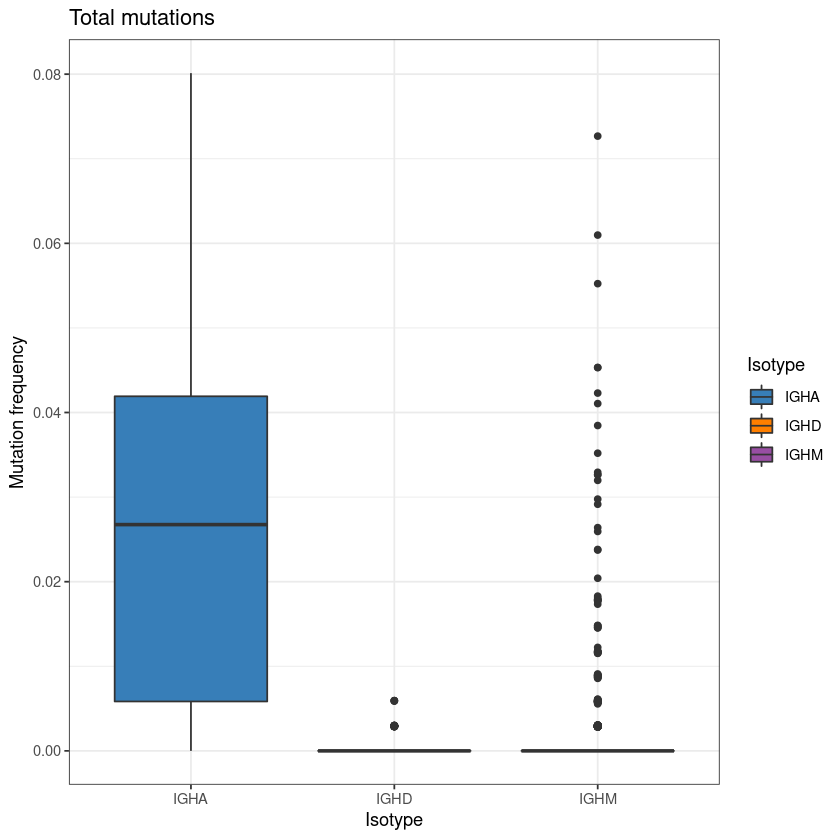

In [10]:
g1 <- ggplot(db_obs, aes(x=c_call, y=mu_freq, fill=c_call)) +
    theme_bw() + ggtitle("Total mutations") +
    xlab("Isotype") + ylab("Mutation frequency") +
    scale_fill_manual(name="Isotype", values=IG_COLORS) +
    geom_boxplot()
plot(g1)